Перші 5 рядків датафрейму:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


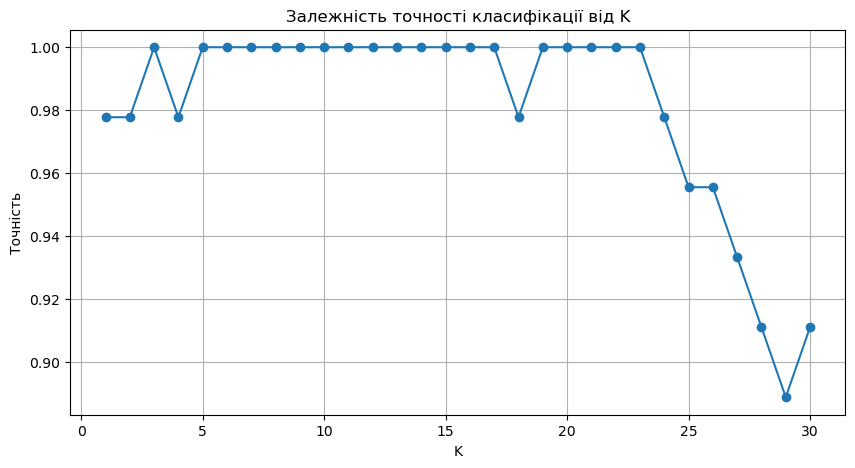

Найкраще K: 3
Максимальна точність: 1.0
Точність фінальної моделі: 1.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"B:\IrisData_full.csv", header=None)

df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

print("Перші 5 рядків датафрейму:")
display(df.head())

X = df.drop("class", axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

K_values = range(1, 31)
accuracies = []

for k in K_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10,5))
plt.plot(K_values, accuracies, marker='o')
plt.xlabel("K")
plt.ylabel("Точність")
plt.title("Залежність точності класифікації від K")
plt.grid(True)
plt.show()

best_k = K_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print("Найкраще K:", best_k)
print("Максимальна точність:", best_accuracy)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
final_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

print("Точність фінальної моделі:", final_accuracy)